#  Global Cancer Patients Analysis & Prediction (2015–2024)

## 1. Introduction
This notebook analyzes a global cancer dataset (2015–2024) and builds a model
to predict the **Target Severity** of cancer cases. It includes:

• Data cleaning & preprocessing  
• Exploratory data analysis (EDA) & visualizations  
• Random Forest regression model  
• Model evaluation and feature importance insights

## 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## 3. Load Dataset

In [2]:
df = pd.read_csv("global_cancer_patients_2015_2024.csv")
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


## 4. Data Overview

In [3]:
print("Dataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())


Dataset shape: (50000, 15)

Data types:
 Patient_ID                object
Age                        int64
Gender                    object
Country_Region            object
Year                       int64
Genetic_Risk             float64
Air_Pollution            float64
Alcohol_Use              float64
Smoking                  float64
Obesity_Level            float64
Cancer_Type               object
Cancer_Stage              object
Treatment_Cost_USD       float64
Survival_Years           float64
Target_Severity_Score    float64
dtype: object

Missing values:
 Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64


## 5. Data Cleaning

In [4]:
df = df.drop_duplicates()
df = df.fillna(method="ffill")
print("Shape after cleaning:", df.shape)

Shape after cleaning: (50000, 15)


C:\Users\alyye\AppData\Local\Temp\ipykernel_24228\992730878.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


## 6. Exploratory Data Analysis (EDA)

C:\Users\alyye\AppData\Local\Temp\ipykernel_24228\3844527038.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cancers.values, y=top_cancers.index, palette="muted")


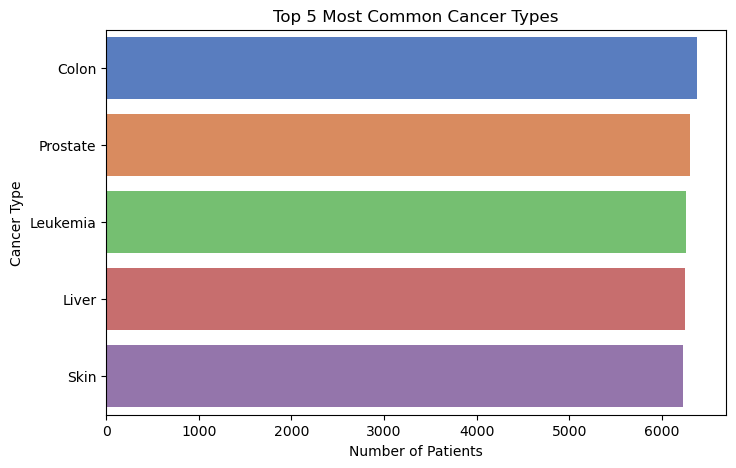

In [5]:
top_cancers = df['Cancer_Type'].value_counts().nlargest(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top_cancers.values, y=top_cancers.index, palette="muted")
plt.title("Top 5 Most Common Cancer Types")
plt.xlabel("Number of Patients")
plt.ylabel("Cancer Type")
plt.show()

C:\Users\alyye\AppData\Local\Temp\ipykernel_24228\472343425.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Gender_Label", palette="pastel")


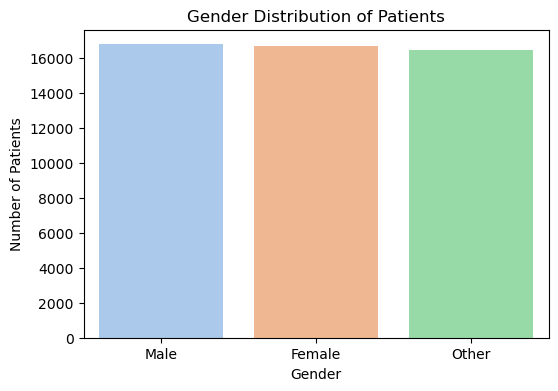

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map gender codes to labels
gender_map = {'Male': 'Male', 'Female': 'Female', 'Other': 'Other'}
df['Gender_Label'] = df['Gender'].map(gender_map)

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Gender_Label", palette="pastel")
plt.title("Gender Distribution of Patients")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.show()


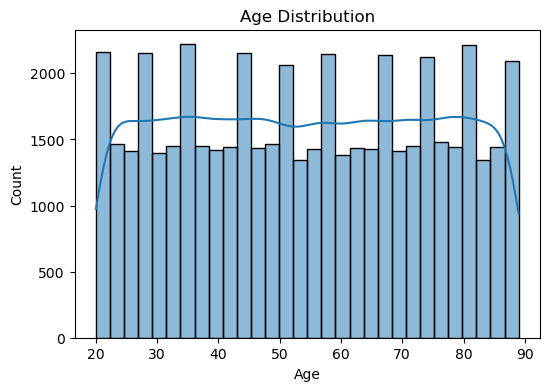

In [7]:
# Distribution of 'Age' (if exists)
if 'Age' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df['Age'], bins=30, kde=True)
    plt.title("Age Distribution")
    plt.show()

C:\Users\alyye\AppData\Local\Temp\ipykernel_24228\1896903128.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


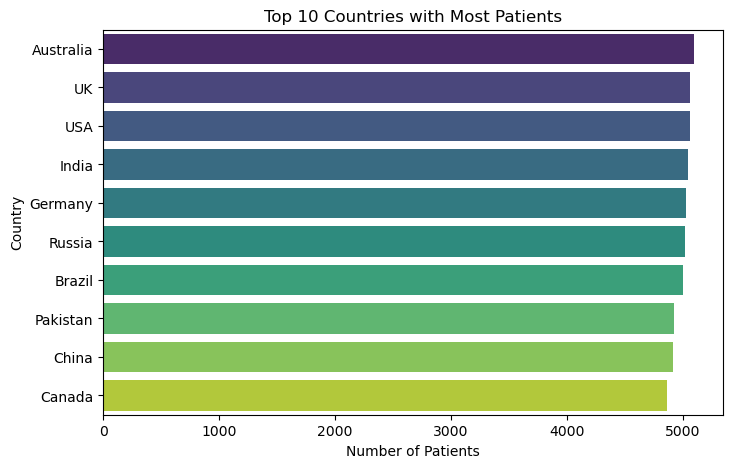

In [8]:
top_countries = df['Country_Region'].value_counts().nlargest(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries with Most Patients")
plt.xlabel("Number of Patients")
plt.ylabel("Country")
plt.show()

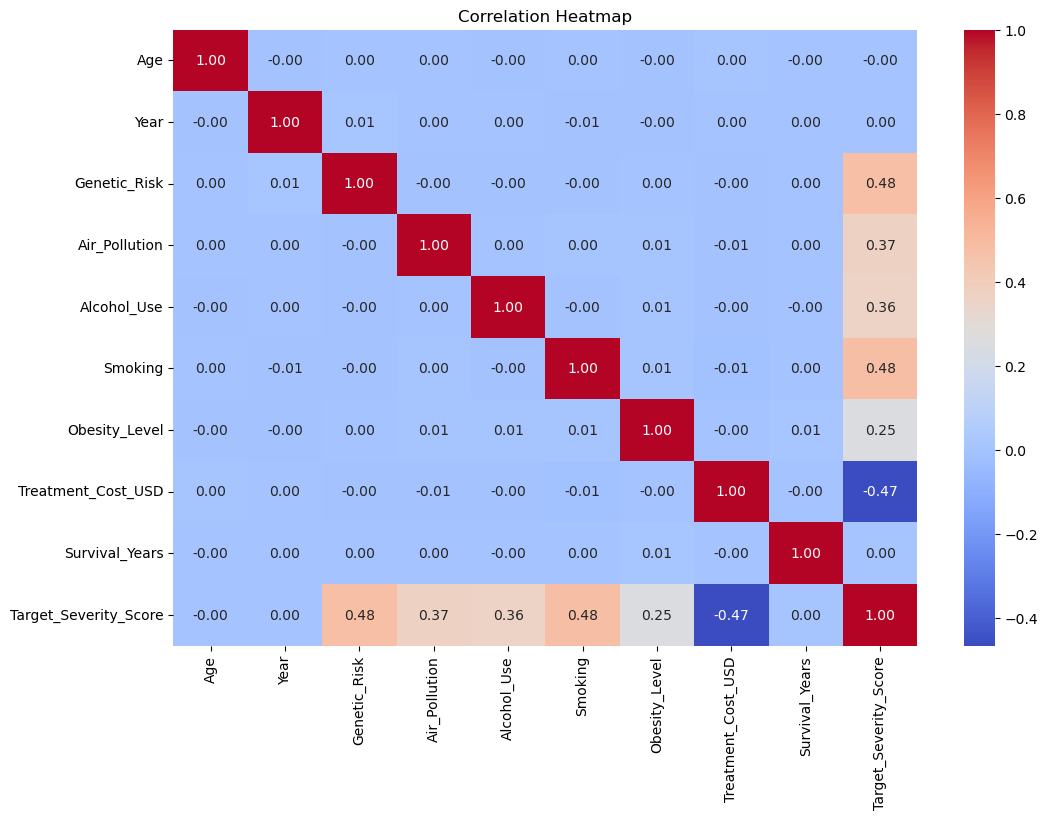

In [9]:
# Correlation with Target Severity
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## 7. Encode Categorical Features

In [10]:
le = LabelEncoder()
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = le.fit_transform(df[col])


## 8. Define Features & Target

In [11]:
X = df.drop("Target_Severity_Score", axis=1)
y = df["Target_Severity_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 9. Train Random Forest Regressor

In [12]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 0.03
R² Score: 0.98


## 10. Feature Importance Visualization

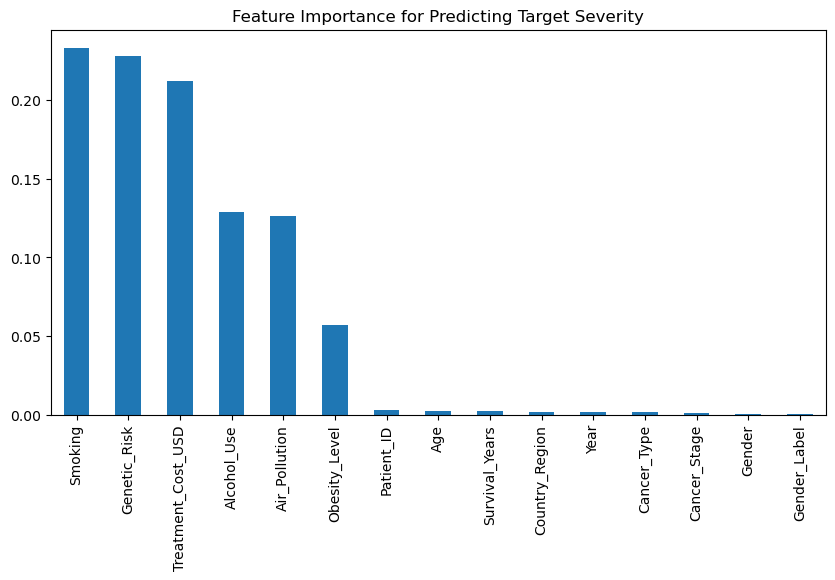

In [13]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns)

plt.figure(figsize=(10,5))
feat_imp.sort_values(ascending=False).plot(kind="bar")
plt.title("Feature Importance for Predicting Target Severity")
plt.show()


## 11. Conclusion
- Cleaned and preprocessed a global cancer dataset (removed duplicates, handled missing data).
- Conducted exploratory analysis, including distribution checks and correlation heatmap.
- Built a **Random Forest Regressor** to predict **Target Severity**, achieving:
    - **RMSE** = {np.sqrt(mse):.2f}
    - **R² Score** = {r2:.2f}
- Identified key predictive features through model importance.

This polished notebook demonstrates a full end-to-end data science workflow: from raw data to visual insights and predictive modeling, delivering _"INSIGHTS AT EVERY STEP."_  


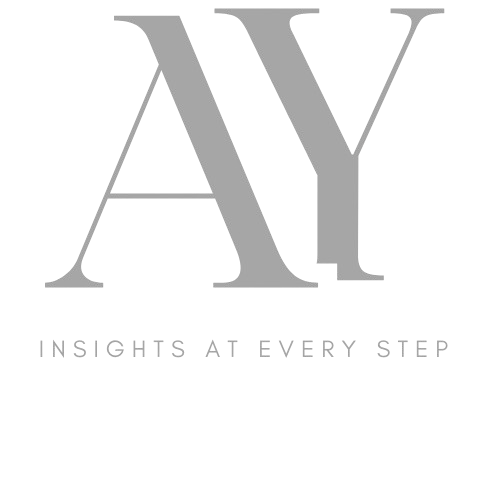